In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read original data
path_to_data= "../data/raw/MTurkData/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv"
fitbit_4_12_16_daily_activity = pd.read_csv(path_to_data)
fitbit_4_12_16_daily_activity.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

First I just try to fit a model on steps -> calories

In [3]:
steps = fitbit_4_12_16_daily_activity["TotalSteps"]
steps.describe()

count      940.000000
mean      7637.910638
std       5087.150742
min          0.000000
25%       3789.750000
50%       7405.500000
75%      10727.000000
max      36019.000000
Name: TotalSteps, dtype: float64

In [4]:
calories = fitbit_4_12_16_daily_activity["Calories"]
calories.describe()

count     940.000000
mean     2303.609574
std       718.166862
min         0.000000
25%      1828.500000
50%      2134.000000
75%      2793.250000
max      4900.000000
Name: Calories, dtype: float64

In [5]:
fitbit_id_steps_calories = pd.concat([fitbit_4_12_16_daily_activity["Id"], 
           fitbit_4_12_16_daily_activity["TotalSteps"], 
           fitbit_4_12_16_daily_activity["Calories"]],
        axis=1)
fitbit_id_steps_calories.describe()

,Id,TotalSteps,Calories
count,9.400000e+02,940.000000,940.000000
mean,4.855407e+09,7637.910638,2303.609574
std,2.424805e+09,5087.150742,718.166862
min,1.503960e+09,0.000000,0.000000
25%,2.320127e+09,3789.750000,1828.500000
50%,4.445115e+09,7405.500000,2134.000000
75%,6.962181e+09,10727.000000,2793.250000
max,8.877689e+09,36019.000000,4900.000000


In [6]:
pd.DataFrame(fitbit_id_steps_calories.groupby("Id").mean())

,TotalSteps,Calories
Id,,
1503960366,12116.741935,1816.419355
1624580081,5743.903226,1483.354839
1644430081,7282.966667,2811.300000
1844505072,2580.064516,1573.483871
1927972279,916.129032,2172.806452
2022484408,11370.645161,2509.967742
2026352035,5566.870968,1540.645161
2320127002,4716.870968,1724.161290
2347167796,9519.666667,2043.444444


In [7]:
X_steps = fitbit_id_steps_calories["TotalSteps"]
y_calories = fitbit_id_steps_calories["Calories"]

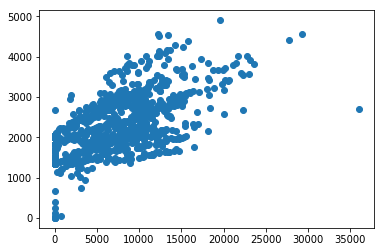

In [8]:
# Plot the data on a scatter plot
plt.scatter(X_steps, y_calories);

In [19]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_steps, y_calories, random_state=1)

In [10]:
# Trying Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
Xtrain.shape

(705,)

In [11]:
# Adding a new axis to Xtrain
Xtrain = Xtrain[:, np.newaxis]
Xtrain.shape

(705, 1)

In [12]:
model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
Xtest = Xtest[:, np.newaxis]

In [14]:
pred = model.predict(Xtest)

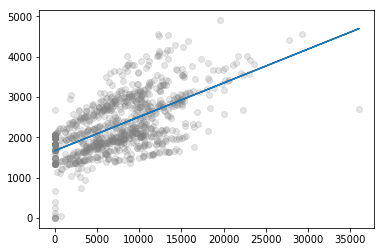

In [15]:
plt.scatter(X_steps, y_calories, alpha=0.2, color="gray")
plt.plot(Xtest, pred);

Prediction test

In [16]:
model.predict(10000)

array([2504.13644218])

## Accuracy

In [17]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, pred)
print("In averge your model is {} calories +/- wrong".format(int(mae)))

In averge your model is 459 calories +/- wrong


In [20]:
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(ytest, pred)
msle

0.14716858432661103